In [8]:
import numpy as np
import pandas as pd
import sys

## Importing csv

In [2]:
subs = pd.read_csv('subs.csv').squeeze()

In [5]:
kohli = pd.read_csv('kohli_ipl.csv',index_col='match_no').squeeze()
kohli.head()

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [7]:
bolly = pd.read_csv('bollywood.csv',index_col='movie').squeeze()
bolly.head(3)

movie
Uri: The Surgical Strike                Vicky Kaushal
Battalion 609                             Vicky Ahuja
The Accidental Prime Minister (film)      Anupam Kher
Name: lead, dtype: object

## astype  --> useful for memory management

In [9]:
sys.getsizeof(kohli)

3472

In [10]:
kohli = kohli.astype('int16')

In [11]:
sys.getsizeof(kohli)

2182

## between  --> similar to SQL between, both ends included

In [12]:
kohli[(kohli>=50) & (kohli<100)].count()

45

In [13]:
kohli[kohli.between(50,99)].count()

45

## clip --> numpy clipping for min and max clipping

<Axes: ylabel='Density'>

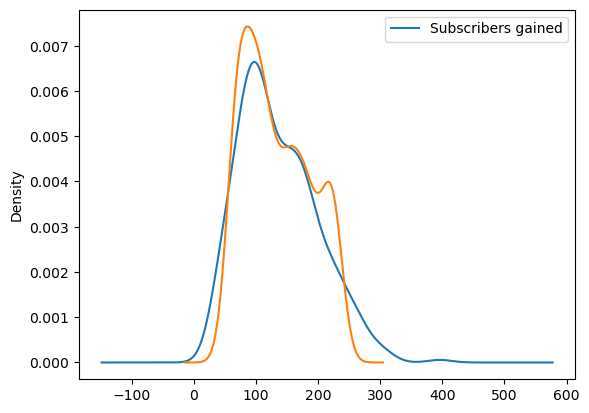

In [23]:
subs.plot(kind = 'kde',legend = True)

lower = np.percentile(subs,10)
upper = np.percentile(subs,90)
subs.clip(lower,upper).plot(kind = 'kde')

In [22]:
print(np.percentile(subs,10))
print(np.percentile(subs,90))

65.0
224.60000000000002


## drop duplicates -->to drop duplicate values

In [24]:
temp = pd.Series([1,2,2,3,1,4,2,4,1])
temp

0    1
1    2
2    2
3    3
4    1
5    4
6    2
7    4
8    1
dtype: int64

In [25]:
temp.drop_duplicates(keep='first')

0    1
1    2
3    3
5    4
dtype: int64

In [26]:
temp.drop_duplicates(keep='last')

3    3
6    2
7    4
8    1
dtype: int64

## isnull or isna

In [27]:
temp2 = pd.Series([1,2,3,np.nan,5,np.nan,6,7,8,np.nan])
temp2

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    NaN
6    6.0
7    7.0
8    8.0
9    NaN
dtype: float64

In [28]:
temp2.isnull()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7    False
8    False
9     True
dtype: bool

In [29]:
temp2.isna()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7    False
8    False
9     True
dtype: bool

In [30]:
temp2.isnull().sum()

3

In [31]:
temp2[~temp2.isna()]

0    1.0
1    2.0
2    3.0
4    5.0
6    6.0
7    7.0
8    8.0
dtype: float64

## dropna

In [32]:
temp3 = temp2.dropna()
print(temp3)

0    1.0
1    2.0
2    3.0
4    5.0
6    6.0
7    7.0
8    8.0
dtype: float64


## fillna --> imputation

In [35]:
# constant imputation
temp4 = temp2.fillna(0)
print(temp4)

0    1.0
1    2.0
2    3.0
3    0.0
4    5.0
5    0.0
6    6.0
7    7.0
8    8.0
9    0.0
dtype: float64


In [34]:
# mean/ median imputatipn
temp5 = temp2.fillna(temp2.median())
print(temp5)

0    1.0
1    2.0
2    3.0
3    5.0
4    5.0
5    5.0
6    6.0
7    7.0
8    8.0
9    5.0
dtype: float64


## isin --> T/F if values are in the given list

In [36]:
# Find matches where Kohli got out in 49,59,89,99
kohli[kohli.isin([49,59,89,99])]

match_no
82    99
86    49
Name: runs, dtype: int16

## apply to apply functions to a Series

## give first name of actors in uppercase

In [37]:
bolly.head(10)

movie
Uri: The Surgical Strike                       Vicky Kaushal
Battalion 609                                    Vicky Ahuja
The Accidental Prime Minister (film)             Anupam Kher
Why Cheat India                                Emraan Hashmi
Evening Shadows                             Mona Ambegaonkar
Soni (film)                             Geetika Vidya Ohlyan
Fraud Saiyaan                                   Arshad Warsi
Bombairiya                                      Radhika Apte
Manikarnika: The Queen of Jhansi              Kangana Ranaut
Thackeray (film)                         Nawazuddin Siddiqui
Name: lead, dtype: object

In [38]:
bolly_upper = bolly.apply(lambda x: x.upper().split()[0])
bolly_upper.head(10)

movie
Uri: The Surgical Strike                     VICKY
Battalion 609                                VICKY
The Accidental Prime Minister (film)        ANUPAM
Why Cheat India                             EMRAAN
Evening Shadows                               MONA
Soni (film)                                GEETIKA
Fraud Saiyaan                               ARSHAD
Bombairiya                                 RADHIKA
Manikarnika: The Queen of Jhansi           KANGANA
Thackeray (film)                        NAWAZUDDIN
Name: lead, dtype: object

## Category creation using apply

In [39]:
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

In [40]:
def day_type(x):
    if x<100:
        return 'bad'
    elif x<200:
        return 'average'
    else:
        return 'good'

In [41]:
sub_day = subs.apply(day_type)

<Axes: >

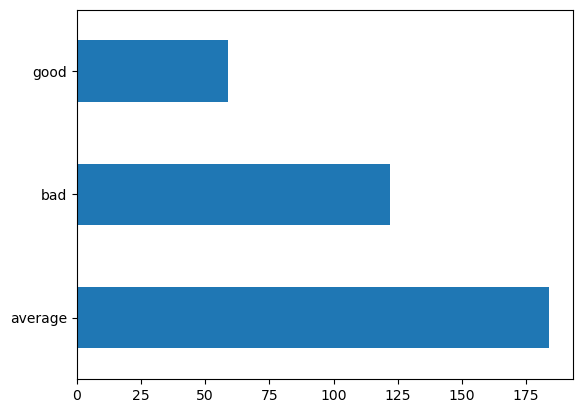

In [44]:
sub_day.value_counts().plot(kind = 'barh')

## copy

In [45]:
c1 = pd.Series(np.random.randint(10,100,10))
print(c1)

0    67
1    59
2    14
3    93
4    34
5    71
6    46
7    52
8    27
9    17
dtype: int32


In [46]:
c1.mean()

48.0

In [47]:
c2 = c1.head()

In [49]:
c2[1] = 99999

In [50]:
c2

0       67
1    99999
2       14
3       93
4       34
dtype: int32

In [51]:
print(c1)

0       67
1    99999
2       14
3       93
4       34
5       71
6       46
7       52
8       27
9       17
dtype: int32


### So, the original array itself got changed since c2 is a view of c1, not a copy  
### To avoid such reassignment create a copy

In [52]:
c1 = pd.Series(np.random.randint(10,100,10))
c1

0    84
1    93
2    10
3    45
4    44
5    66
6    84
7    58
8    39
9    50
dtype: int32

In [56]:
c3 = c1.copy().head()
c3[1] = 99999

In [57]:
c3

0       84
1    99999
2       10
3       45
4       44
dtype: int32

In [58]:
c1

0    84
1    93
2    10
3    45
4    44
5    66
6    84
7    58
8    39
9    50
dtype: int32